<a href="https://colab.research.google.com/github/nicolycosta/RedesNeurais-SeriesTemporais/blob/main/RNIPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Em andamento ..

In [11]:
!pip install neuralprophet[live]
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Pré Processamento**

In [2]:
df = pd.read_excel("Variação0.xlsx")
s = df.iloc[:,0:1]
s.insert(1, "energia", df['Consumo Comercial'], allow_duplicates=False)
s= s.dropna()
serie = s
serie['Mês'] = pd.to_datetime(serie['Mês']) 
serie = serie.set_index('Mês')
serie

,energia
Mês,
2004-01-01,78075.21
2004-02-01,72466.75
2004-03-01,75856.86
2004-04-01,78778.78
2004-05-01,79714.30
...,...
2021-08-01,181711.98
2021-09-01,177392.31
2021-10-01,180006.38


# **Análise Exploratória**

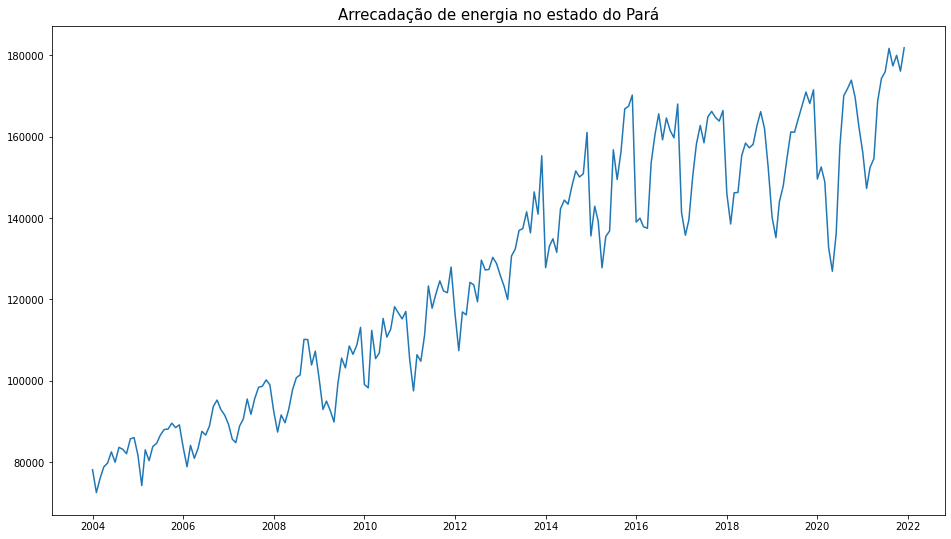

In [3]:
plt.figure(figsize=(16,9))

plt.plot()
plt.plot(serie['energia'])
plt.title('Arrecadação de energia no estado do Pará',fontsize=15)
plt.ylabel('',fontsize=14)
#plt.savefig('Gráfico.png', format='png') #salvar o imagem

plt.show()

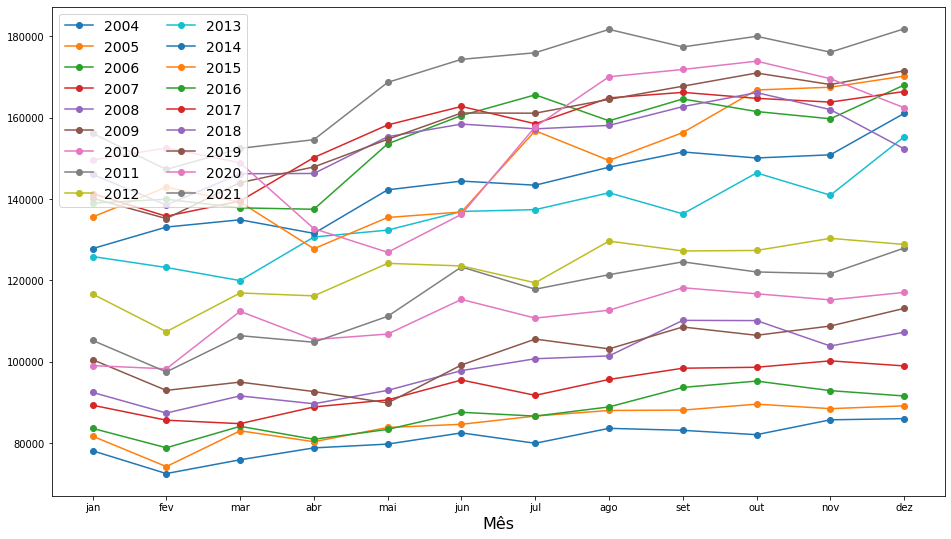

In [4]:
anos = serie.index.year.unique()
meses = serie.index.month.unique()
mesesStr = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

plt.figure(figsize = (16,9))

for i in anos:
    ZtAno = serie[(serie.index.year == i)]
    nMeses = len(ZtAno)
    plt.plot(mesesStr[0:nMeses], ZtAno, 'o-', label = str(i))

plt.xlabel('Mês',fontsize=16)
plt.legend(loc = 'upper left', prop = {'size': 14}, ncol = 2)

plt.show()

# **Separação em treino e teste**

In [5]:
# NeuralProbhet espera uma coluna ds e uma y.
serieNova = s
serieNova.columns = ['ds', 'y']
serieNova 

,ds,y
0,2004-01-01,78075.21
1,2004-02-01,72466.75
2,2004-03-01,75856.86
3,2004-04-01,78778.78
4,2004-05-01,79714.30
...,...,...
211,2021-08-01,181711.98
212,2021-09-01,177392.31
213,2021-10-01,180006.38
214,2021-11-01,176108.00


In [6]:
nSamples = len(serieNova) 
nTestSamples = 12     
nModelSamples = nSamples - nTestSamples

print(f'Número de amostras: {nSamples}')
print(f'Número de amostras para treino: {nModelSamples}')
print(f'Número de amostras para teste: {nTestSamples}')

Train = serieNova.iloc[:nModelSamples]
Test = serieNova.iloc[nModelSamples:]


Número de amostras: 216
Número de amostras para treino: 204
Número de amostras para teste: 12


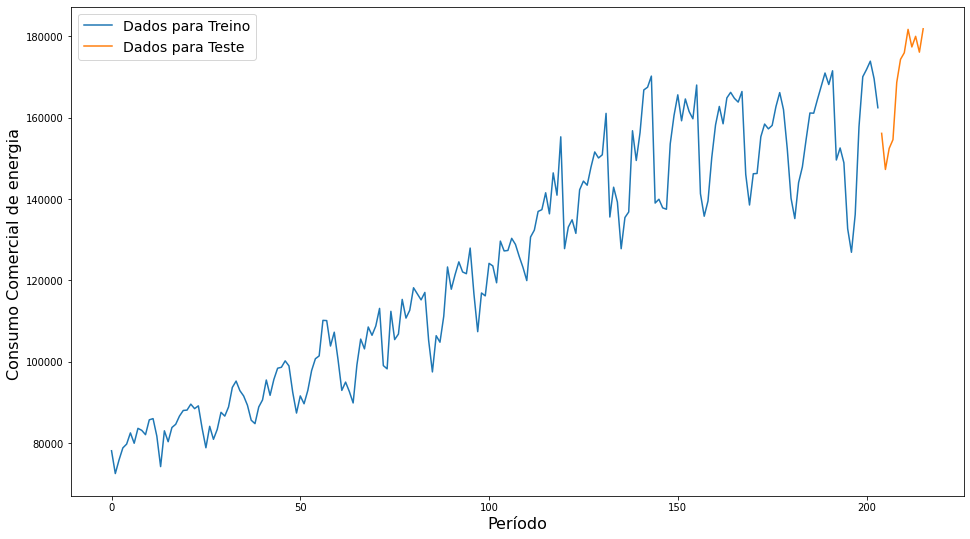

In [7]:
plt.figure(figsize = (16, 9))

plt.plot(Train['y'], label = 'Dados para Treino')
plt.plot(Test['y'], label = 'Dados para Teste')
plt.legend(loc = 'upper left', prop = {'size': 14})
plt.xlabel('Período',fontsize=16)
plt.ylabel('Consumo Comercial de energia ',fontsize=16)

plt.show()


# **NeuralProphet**
#### NeuralProphet é uma versão atualizada do Prophet
Usando o mecanismo de otimização Gradient Descent do PyTorch

In [16]:
modeladd = NeuralProphet(seasonality_mode="additive",
                      epochs= 500)
modelmul = NeuralProphet(seasonality_mode="multiplicative",
                      epochs= 500)

In [17]:
modeladd.fit(Train, freq= 'M')

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.176% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.13E+00, min: 1.00E-01


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.74E-02, min: 1.21E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.75E-01
Epoch[500/500]: 100%|██████████| 500/500 [00:14<00:00, 33.77it/s, SmoothL1Loss=0.00156, MAE=4.04e+3, RMSE=5.2e+3, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.775638,115295.925858,137713.261029,0.0
1,0.732898,110944.032935,131213.949142,0.0
2,0.691114,106530.456036,127559.090993,0.0
3,0.647851,101878.381127,123111.028186,0.0
4,0.606357,97261.999617,119125.333640,0.0
...,...,...,...,...
495,0.001563,4042.901549,5182.597829,0.0
496,0.001562,4041.748234,5217.615110,0.0
497,0.001562,4041.980660,5227.991355,0.0
498,0.001562,4041.899203,5161.373056,0.0


In [18]:
modelmul.fit(Train, freq= 'M')

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.176% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.71E-02, min: 5.37E-01


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.71E-02, min: 4.45E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.88E-02
Epoch[500/500]: 100%|██████████| 500/500 [00:14<00:00, 34.19it/s, SmoothL1Loss=0.00123, MAE=3.51e+3, RMSE=4.58e+3, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.889195,124340.710325,146784.242034,0.0
1,0.859811,121386.082721,144158.060815,0.0
2,0.830310,118419.484681,141084.606005,0.0
3,0.798846,115221.961857,136728.504136,0.0
4,0.767785,112022.857920,132846.253983,0.0
...,...,...,...,...
495,0.001231,3511.483188,4539.416475,0.0
496,0.001231,3511.385804,4586.329264,0.0
497,0.001231,3511.378365,4566.173273,0.0
498,0.001231,3511.251489,4526.685092,0.0


De acordo com os critérios de decisão MAE e RMSE, o modelo que mais de adequa a série, é com o parâmetro Multiplicativo.

In [19]:
pred = modeladd.make_future_dataframe(Train, periods = 9)
forecast = modeladd.predict(pred)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.176% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 77.778% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 77.778% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


,ds,y,yhat1,residual1,trend,season_yearly
0,2020-12-31,None,148563.843750,NaN,156012.437500,-7448.577148
1,2021-01-31,None,145403.765625,NaN,156030.593750,-10626.818359
2,2021-02-28,None,148194.218750,NaN,156046.968750,-7852.751953
3,2021-03-31,None,147310.062500,NaN,156065.125000,-8755.062500
4,2021-04-30,None,151173.843750,NaN,156082.703125,-4908.863770


https://blog.katastros.com/a?ID=d5e2e8a8-e971-4db9-a5b0-e8f1dc592e89